In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("seaborn")
# %matplotlib widget
%matplotlib inline
plt.rcParams["figure.figsize"] = (22,4)

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("data/alpha/memory-susan.csv")
dataset = dataset.loc[(dataset["policy"] != "mru") & (dataset["policy"] != "lfu")] # Drop the worst performers to better highlight differences in graphs
print(dataset.head())
print(dataset.dtypes)
print(dataset.describe())

    policy  l1_size predictor  num_cycles
0   random     2048     local     4433402
1      lru     4096     local     4298757
2  treelru     1024     local     4844768
3      lru      512     local     6432183
4   random     4096     local     4318388
policy        object
l1_size        int64
predictor     object
num_cycles     int64
dtype: object
          l1_size    num_cycles
count    45.00000  4.500000e+01
mean   1587.20000  6.395810e+06
std    1412.33053  2.937532e+06
min     256.00000  4.274494e+06
25%     512.00000  4.373561e+06
50%    1024.00000  4.844768e+06
75%    2048.00000  6.568590e+06
max    4096.00000  1.377614e+07


In [3]:
data_by_policy = dataset.groupby("policy")
data_by_policy.describe()

l1_size                                                    \
               count    mean         std    min    25%     50%     75%   
policy                                                                   
brrip            5.0  1587.2  1561.39015  256.0  512.0  1024.0  2048.0   
fifo             5.0  1587.2  1561.39015  256.0  512.0  1024.0  2048.0   
lip              5.0  1587.2  1561.39015  256.0  512.0  1024.0  2048.0   
lru              5.0  1587.2  1561.39015  256.0  512.0  1024.0  2048.0   
nru              5.0  1587.2  1561.39015  256.0  512.0  1024.0  2048.0   
random           5.0  1587.2  1561.39015  256.0  512.0  1024.0  2048.0   
rrip             5.0  1587.2  1561.39015  256.0  512.0  1024.0  2048.0   
secondchance     5.0  1587.2  1561.39015  256.0  512.0  1024.0  2048.0   
treelru          5.0  1587.2  1561.39015  256.0  512.0  1024.0  2048.0   

                     num_cycles                                      \
                 max      count       mean           std        min   
policy                                                                
brrip         4096.0        5.0  6581848.2  3.704904e+06  4280725.0   
fifo          4096.0        5.0  6340619.6  2.955604e+06  4333873.0   
lip           4096.0        5.0  6890751.0  3.964228e+06  4357562.0   
lru           4096.0        5.0  6263867.6  2.958296e+06  4298757.0   
nru           4096.0        5.0  6144007.2  2.863469e+06  4278582.0   
random        4096.0        5.0  6452015.2  3.305121e+06  4318388.0   
rrip          4096.0        5.0  6295043.6  2.895596e+06  4319668.0   
secondchance  4096.0        5.0  6330269.8  3.351741e+06  4274494.0   
treelru       4096.0        5.0  6263867.6  2.958296e+06  4298757.0   

                                                           
                    25%        50%        75%         max  
policy                                                     
brrip         4362269.0  4770345.0  6480413.0  13015489.0  
fifo          4464303.0  4897504.0  6644884.0  11362534.0  
lip           4509096.0  5062570.0  6748387.0  13776140.0  
lru           4412680.0  4844768.0  6432183.0  11330950.0  
nru           4373561.0  4754982.0  6245093.0  11067818.0  
random        4433402.0  4862653.0  6489174.0  12156459.0  
rrip          4437635.0  4930070.0  6568590.0  11219255.0  
secondchance  4365024.0  4742732.0  6084958.0  12184141.0  
treelru       4412680.0  4844768.0  6432183.0  11330950.0

# Policies by average number of cycles

,num_cycles
policy,
nru,6144007.2
lru,6263867.6
treelru,6263867.6
rrip,6295043.6
secondchance,6330269.8
fifo,6340619.6
random,6452015.2
brrip,6581848.2
lip,6890751.0


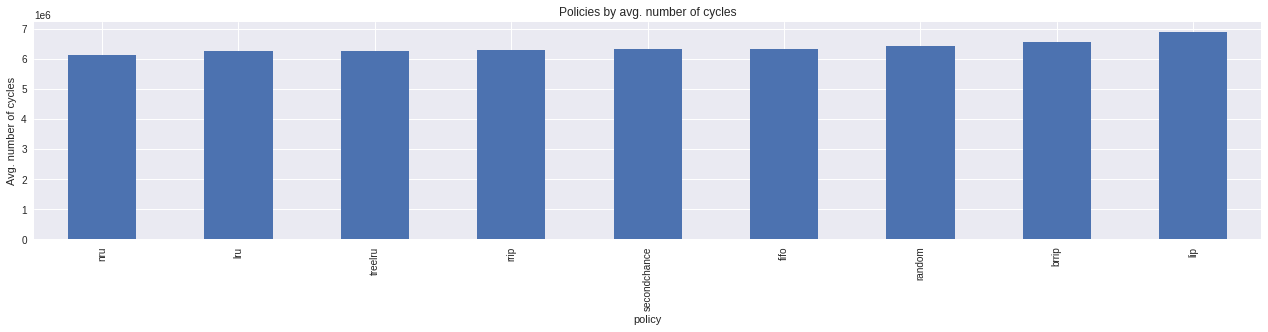

In [4]:
avg_cycles = data_by_policy["num_cycles"].mean().sort_values()

fig, ax = plt.subplots()
ax.set_title("Policies by avg. number of cycles")
ax.set_xlabel("Policy")
ax.set_ylabel("Avg. number of cycles")
avg_cycles.plot.bar(ax=ax)

pd.DataFrame(avg_cycles)

# Number of cycles with high vs. low cache pressure

<AxesSubplot:xlabel='policy'>

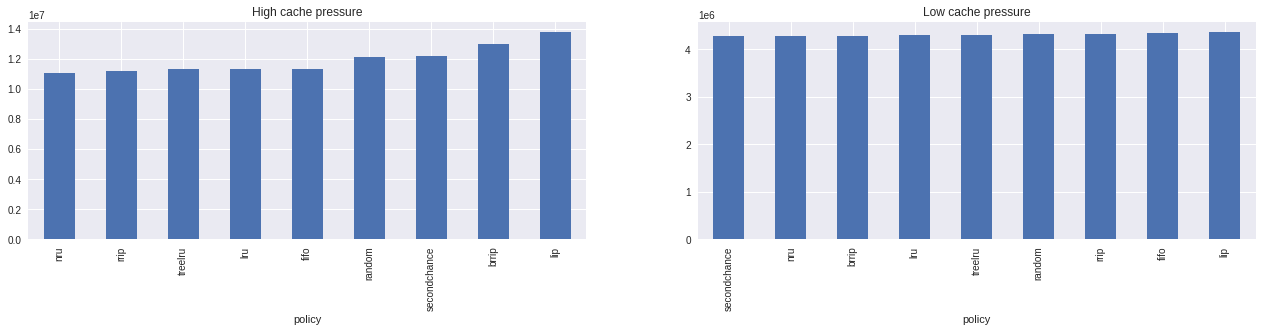

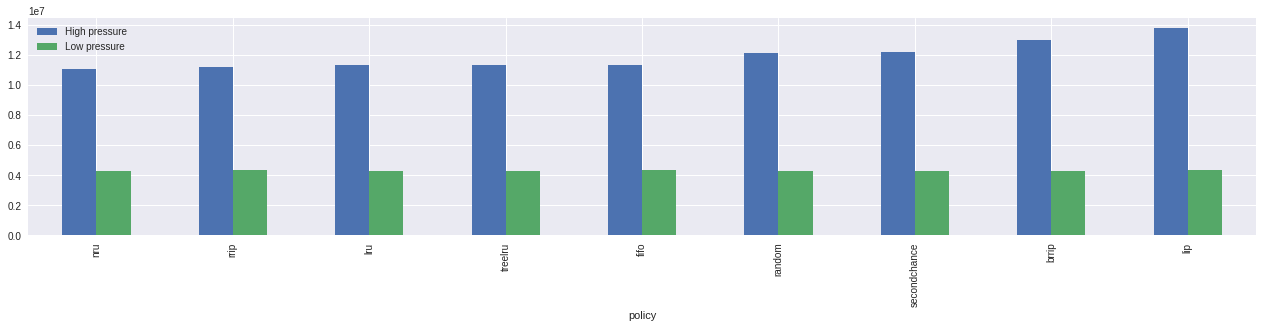

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_title("High cache pressure")
min_size = dataset[["l1_size"]].min()["l1_size"]
high_pressure_data = dataset.groupby(by=["l1_size"]).get_group(min_size).set_index("policy")["num_cycles"].sort_values()
high_pressure_data.plot.bar(ax=ax1)

ax2.set_title("Low cache pressure")
max_size = dataset[["l1_size"]].max()["l1_size"]
low_pressure_data = dataset.groupby(by=["l1_size"]).get_group(max_size).set_index("policy")["num_cycles"].sort_values()
low_pressure_data.plot.bar(ax=ax2)

pd.DataFrame({"High pressure": high_pressure_data, "Low pressure": low_pressure_data}).sort_values("High pressure").plot.bar()

# Number of cycles for varying L1 sizes

num_cycles                                                 \
                  count       mean           std        min        25%   
policy                                                                   
brrip               5.0  6581848.2  3.704904e+06  4280725.0  4362269.0   
fifo                5.0  6340619.6  2.955604e+06  4333873.0  4464303.0   
lip                 5.0  6890751.0  3.964228e+06  4357562.0  4509096.0   
lru                 5.0  6263867.6  2.958296e+06  4298757.0  4412680.0   
nru                 5.0  6144007.2  2.863469e+06  4278582.0  4373561.0   
random              5.0  6452015.2  3.305121e+06  4318388.0  4433402.0   
rrip                5.0  6295043.6  2.895596e+06  4319668.0  4437635.0   
secondchance        5.0  6330269.8  3.351741e+06  4274494.0  4365024.0   
treelru             5.0  6263867.6  2.958296e+06  4298757.0  4412680.0   

                                                
                    50%        75%         max  
policy                                          
brrip         4770345.0  6480413.0  13015489.0  
fifo          4897504.0  6644884.0  11362534.0  
lip           5062570.0  6748387.0  13776140.0  
lru           4844768.0  6432183.0  11330950.0  
nru           4754982.0  6245093.0  11067818.0  
random        4862653.0  6489174.0  12156459.0  
rrip          4930070.0  6568590.0  11219255.0  
secondchance  4742732.0  6084958.0  12184141.0  
treelru       4844768.0  6432183.0  11330950.0

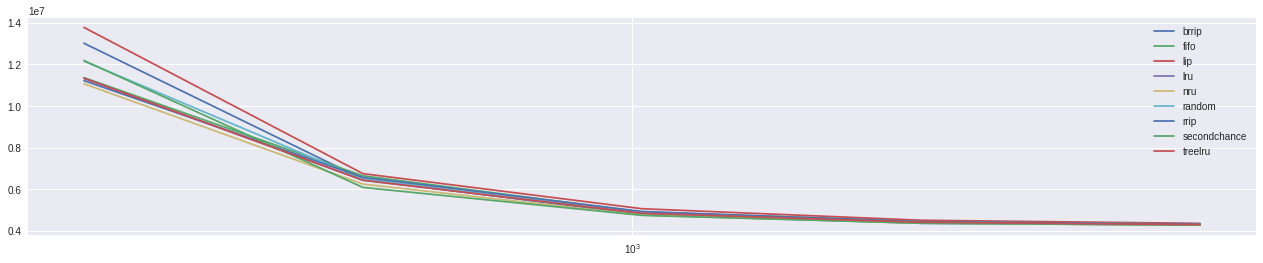

In [6]:
import numpy as np
from scipy.interpolate import griddata

lru_data = dataset.set_index("l1_size").sort_index().groupby("policy")

fig = plt.figure()
ax = fig.subplots()
plt.xscale("log")
for policy, data in lru_data:
    plt.plot(data["num_cycles"], label=policy)
ax.legend()
lru_data.describe()

# Relative performance

Baseline: random replacement = 1.0

num_cycles                                                    \
                  count      mean       std       min       25%       50%   
policy                                                                      
brrip               5.0  1.005113  0.037277  0.981017  0.983955  0.991278   
fifo                5.0  0.995282  0.034794  0.934691  1.003586  1.006970   
lip                 5.0  1.048088  0.049622  1.009071  1.017074  1.039945   
lru                 5.0  0.982082  0.028015  0.932093  0.991218  0.995326   
nru                 5.0  0.965595  0.032686  0.910448  0.962386  0.977858   
random              5.0  1.000000  0.000000  1.000000  1.000000  1.000000   
rrip                5.0  0.990052  0.038052  0.922905  1.000296  1.000955   
secondchance        5.0  0.977947  0.024511  0.937709  0.975338  0.984577   
treelru             5.0  0.982082  0.028015  0.932093  0.991218  0.995326   

                                  
                   75%       max  
policy                            
brrip         0.998650  1.070664  
fifo          1.007167  1.023995  
lip           1.041113  1.133236  
lru           0.995454  0.996322  
nru           0.986502  0.990782  
random        1.000000  1.000000  
rrip          1.012238  1.013864  
secondchance  0.989836  1.002277  
treelru       0.995454  0.996322

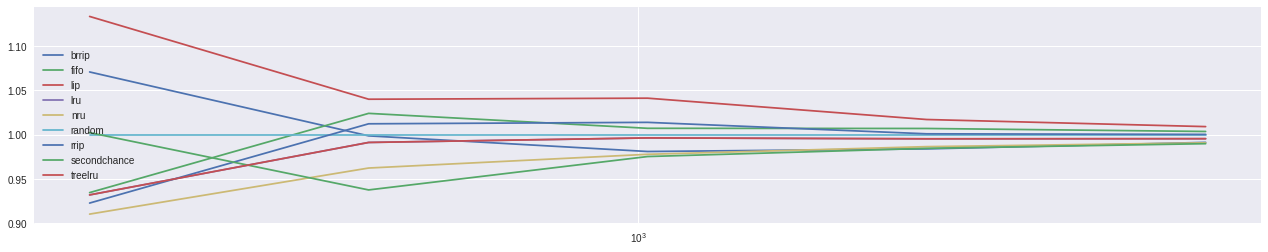

In [7]:
# normalize wrt random policy: above 1 we perform worse, below 1 we perform better
baseline = lru_data.get_group("random")["num_cycles"]

def normalize(item):
    item["num_cycles"] = item["num_cycles"] / baseline
    return(item)

normalized_data = lru_data.apply(normalize).groupby("policy")
fig = plt.figure()
ax = fig.subplots()
plt.xscale("log")
for policy, data in normalized_data:
    plt.plot(data["num_cycles"], label=policy)
ax.legend()
normalized_data.describe()